## Imports
All of the IceVision components can be easily imported with a single line.


In [27]:
from icevision.all import *

### Creating model 1


In [31]:
num_classes = 91 # manually select number of classes (91 for full coco) 
image_size = 384
extra_args = {}

model_type1 = models.ross.efficientdet
backbone1 = model_type.backbones.tf_lite0
extra_args['img_size'] = image_size
model1 = model_type1.model(backbone=backbone1(pretrained=True), num_classes=num_classes, **extra_args)



Now it is just a one-liner to instantiate the model. If you want to try another *option*, just edit the line at the top of the previous cell.

### Creating model 2


In [32]:
num_classes = 91 # manually select number of classes (91 for full coco) 
image_size = 384
extra_args = {}

model_type2 = models.ross.efficientdet
backbone2 = model_type.backbones.tf_lite0
extra_args['img_size'] = image_size
model2 = model_type2.model(backbone=backbone2(pretrained=True), num_classes=num_classes, **extra_args)



Now it is just a one-liner to instantiate the model. If you want to try another *option*, just edit the line at the top of the previous cell.

## Load Models

In [33]:
PATH = 'model1.mm'
model1.load_state_dict(torch.load(PATH))
model1.eval()

PATH = 'model2.mm'
model2.load_state_dict(torch.load(PATH))
model2.eval()

print('Done!')


Done!


### Select image from folder



In [36]:
# load all images from folder for preview
dataset_dir = './coco-2017-set1'
import cv2 
import os 
import glob 
img_dir = "" # Enter Directory of all images  
data_path = dataset_dir + '/train/data' + '/*'

files = glob.glob(data_path) 
imgs = [] 
imgs_path = []
for f1 in files: 
    img = PIL.Image.open(f1)
    imgs.append(img) 
    imgs_path.append(f1)

./coco-2017-set1/train/data/000000054411.jpg


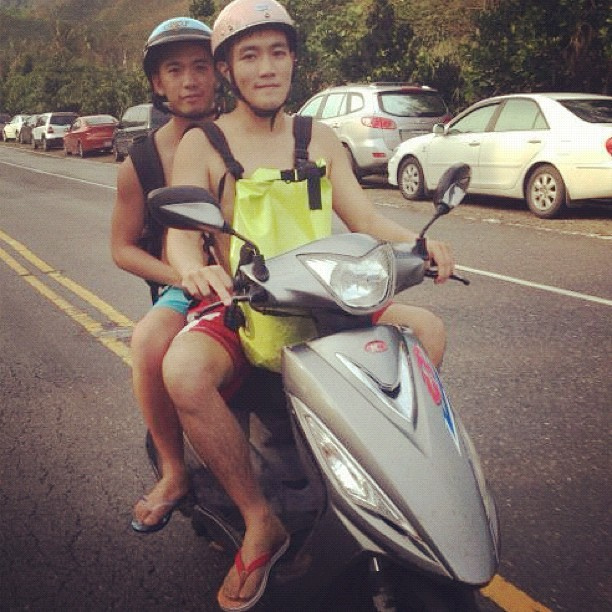

In [39]:
# select and preview one image
image_id = 92

print(imgs_path[image_id])
img = imgs[image_id]
img


### Select image from file



In [45]:
# from PIL import Image
# import requests

# url = r'https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.youtube.com%2Fwatch%3Fv%3D8hEXptpqTVo&psig=AOvVaw3pmZ4qiMz1hwmu0ewrg7eZ&ust=1626581441304000&source=images&cd=vfe&ved=2ahUKEwiH8KmZnunxAhWngGMGHYorB38QjRx6BAgAEA8'
# img = Image.open(requests.get(url, stream=True).raw)    
# img  

# img = Image.open('./coco-2017-set1/train/data/000000001799.jpg')
# img

### Prediction model 1



[<BBox (xmin:243.573974609375, ymin:54.39793395996094, xmax:384.0, ymax:133.97581481933594)>, <BBox (xmin:180.71852111816406, ymin:48.387908935546875, xmax:281.8009948730469, ymax:115.95906066894531)>, <BBox (xmin:83.28148651123047, ymin:0.0, xmax:282.5742492675781, ymax:376.8463439941406)>, <BBox (xmin:84.03278350830078, ymin:67.55911254882812, xmax:316.2070617675781, ymax:384.0)>]
[3, 3, 1, 4]
[    0.80422     0.75307     0.54754      0.5094]


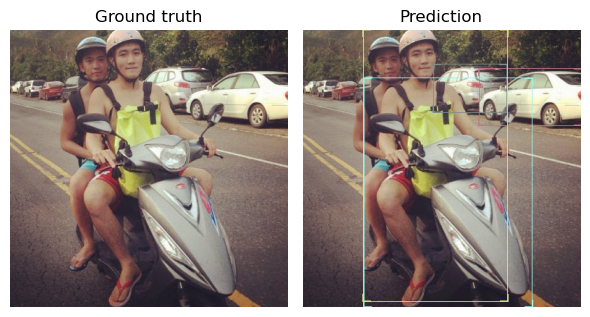

In [41]:
# Inference. Shows scores, labels and bounding boxes.
infer_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(size=384), tfms.A.Normalize()])
infer_ds = Dataset.from_images([img], infer_tfms)

preds = model_type1.predict(model1, infer_ds, keep_images=True)
for x in preds[0].pred.detection.components:
    if 'ScoresRecordComponent' in str(x):
        scores1 = x.scores
        print(scores1)
    if 'InstancesLabelsRecordComponent' in str(x):
        labels1 = x.label_ids
        print(labels1)
    if 'BBoxesRecordComponen' in str(x):
        bboxes1 = x.bboxes
        print(bboxes1)
        
show_preds(preds=preds[0:1])

### Prediction model 2



[    0.80422     0.75307     0.54754      0.5094]
[3, 3, 1, 4]
[<BBox (xmin:243.573974609375, ymin:54.39793395996094, xmax:384.0, ymax:133.97581481933594)>, <BBox (xmin:180.71852111816406, ymin:48.387908935546875, xmax:281.8009948730469, ymax:115.95906066894531)>, <BBox (xmin:83.28148651123047, ymin:0.0, xmax:282.5742492675781, ymax:376.8463439941406)>, <BBox (xmin:84.03278350830078, ymin:67.55911254882812, xmax:316.2070617675781, ymax:384.0)>]


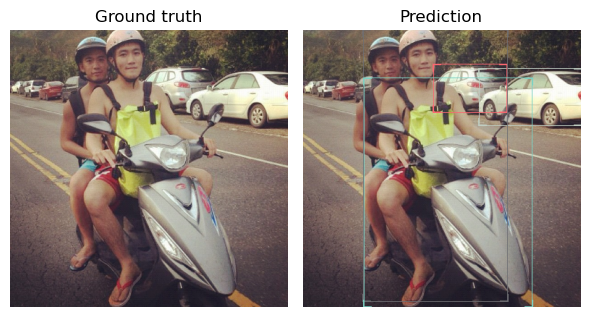

In [42]:
# Inference. Shows scores, labels and bounding boxes.
infer_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(size=384), tfms.A.Normalize()])
infer_ds = Dataset.from_images([img], infer_tfms)

preds = model_type2.predict(model2, infer_ds, keep_images=True)
for x in preds[0].pred.detection.components:
    if 'ScoresRecordComponent' in str(x):
        scores2 = x.scores
        print(scores2)
    if 'InstancesLabelsRecordComponent' in str(x):
        labels2 = x.label_ids
        print(labels2)
    if 'BBoxesRecordComponen' in str(x):
        bboxes2 = x.bboxes
        print(bboxes2)
        
show_preds(preds=preds[0:1])

In [43]:
def overlap_percent(l1, r1, l2, r2):
    x = 0
    y = 1

    x_dist = (min(r1[x], r2[x]) -
              max(l1[x], l2[x]))
 
    y_dist = (min(r1[y], r2[y]) -
              max(l1[y], l2[y]))
    areaI = 0
    if x_dist > 0 and y_dist > 0:
        areaI = x_dist * y_dist
        
    area1 = abs( (l1[0]-r1[0])*(l1[1]-r1[1]) )
    overlap = areaI / area1
 
    return overlap
 

In [46]:
label1 = 1 # label of intrest in model 1 (1 for person in coco)
label2 = 3 # label of intrest in model 2 (3 for car in coco )

for i in range(len(labels1)):
    for j in range(len(labels2)):
        if labels1[i] == label1 and labels2[j] == label2:
            bbox1 = bboxes1[i]
            bbox2 = bboxes1[j]
            l1 = [bbox1.xmin,bbox1.ymin]
            r1 = [bbox1.xmax,bbox1.ymax]
            l2 = [bbox2.xmin,bbox2.ymin]
            r2 = [bbox2.xmax,bbox2.ymax]
         
            print("id_1, id_2: ", i,j)
            print('overlap:', overlap_percent(l1, r1, l2, r2))
            print('')

id_1, id_2:  2 0
overlap: 0.041324176

id_1, id_2:  2 1
overlap: 0.09094553

